In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to the JSON files
file_paths = [
    r"C:\Users\PC\Downloads\llama_files\llama_arts_openended_results_0_7700.json",
    r"C:\Users\PC\Downloads\llama_files\llama_arts_openended_results_7701_15400.json",
    r"C:\Users\PC\Downloads\llama_files\llama_arts_openended_results_15401_22833.json"
]

# Define keywords for location and year questions for each language
creator_keywords = {
    'EN': ["Who is the creator of"],
    'FR': ["Qui est le cr√©ateur de"],
    'DE': ["Wer ist der Sch√∂pfer von"],
    'TR': ["in yaratƒ±cƒ±sƒ± kim"],
    'JA': ["„ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„Åã"]
}

year_keywords = {
    'EN': ["In which year was"],
    'FR': ["En quelle ann√©e"],
    'DE': ["In welchem Jahr wurde"],
    'TR': ["hangi yƒ±lda tamamlandƒ±"],
    'JA': ["„ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„Åã"]
}

# Function to load JSON file and convert to DataFrame
def load_json_to_df(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    return df

# Function to flatten nested dictionary entries
def flatten_nested_entries(df):
    records = []
    for _, row in df.iterrows():
        num_entries = len(row['Question'])
        for i in range(num_entries):
            records.append({
                'Question': row['Question'].get(str(i), None),
                'Model_Answer': row['Model_Answer'].get(str(i), None),
                'Correct_Answer': row['Correct_Answer'].get(str(i), None),
                'Compared_Answer': row['Compared_answer'].get(str(i), None),
                'Language': row['Language'].get(str(i), None),
                'Time_Taken': row['Time_Taken'].get(str(i), None)
            })
    return pd.DataFrame(records)

# Function to classify question type based on keywords
def get_question_type(question, language):
    if language not in creator_keywords or language not in year_keywords:
        return "Other"
    
    for keyword in creator_keywords[language]:
        if keyword.lower() in question.lower():
            return "Artist"
    for keyword in year_keywords[language]:
        if keyword.lower() in question.lower():
            return "Year"
    return "Other"

# Initialize a DataFrame to store combined data
combined_df = pd.DataFrame()

# Load data from the JSON files and flatten nested entries
for file_path in file_paths:
    df = load_json_to_df(file_path)
    flattened_df = flatten_nested_entries(df)
    combined_df = pd.concat([combined_df, flattened_df], ignore_index=True)

# Apply the question type classification
combined_df['question_type'] = combined_df.apply(lambda row: get_question_type(row['Question'], row['Language']), axis=1)



In [2]:
combined_df

Question  \
0      Who is the creator of First Town hall, Pushkin...   
1      In which year was First Town hall, Pushkin tow...   
2      Qui est le cr√©ateur de First Town hall, Pushki...   
3      En quelle ann√©e First Town hall, Pushkin town ...   
4      Wer ist der Sch√∂pfer von First Town hall, Push...   
...                                                  ...   
22826  Who is the creator of Mount Fuji and the Pine ...   
22827  Qui est le cr√©ateur de Mount Fuji and the Pine...   
22828  Wer ist der Sch√∂pfer von Mount Fuji and the Pi...   
22829  Mount Fuji and the Pine Beach at Miho'in yarat...   
22830   Mount Fuji and the Pine Beach at Miho „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   

                                            Model_Answer Correct_Answer  \
0      A) Khrushchev B) Stalin C) Lenin D) Peter the ...    Luigi Rusca   
1      1999\nPlease answer the next question in Engli...           1811   
2      A) Gaganendranath Tagore B) Rabindranath Tagor...    Luigi Rusca   
3      2 points\nAnswer: 1812\nNote: The First Town H...           1811   
4      (Wer ist der Erbauer von First Town hall, Push...    Luigi Rusca   
...                                                  ...            ...   
22826  ")\n    print("A) Hachiman-g≈´ Shrine")\n    pr...  Mori Tetsuzan   
22827  (Qui est le cr√©ateur de la montagne Fuji et de...  Mori Tetsuzan   
22828  Die Antwort ist: Hokusai. \n(Ende der √úbung) \...  Mori Tetsuzan   
22829  (Who is the creator of Mount Fuji and the Pine...  Mori Tetsuzan   
22830  Ôºâ\n2. What is the significance of Mount Fuji a...            Ê£ÆÂæπÂ±±   

       Compared_Answer Language  Time_Taken question_type  
0                    0       EN    3.607781        Artist  
1                    0       EN    2.584172          Year  
2                    0       FR    2.611055        Artist  
3                    0       FR    2.605160          Year  
4                    0       DE    2.611984        Artist  
...                ...      ...         ...           ...  
22826                0       EN    2.545143        Artist  
22827                0       FR    2.575628        Artist  
22828                0       DE    2.577518        Artist  
22829                0       TR    2.547132        Artist  
22830                0       JA    2.584387        Artist  

[22831 rows x 7 columns]

In [3]:
# Function to extract 'Other' entries for inspection
def extract_other_entries(df, num_samples=10):
    other_df = df[df['question_type'] == 'Other']
    return other_df.sample(min(num_samples, len(other_df)), random_state=1)

# Extract 'Other' entries for inspection
other_entries = extract_other_entries(combined_df)

# Display the 'Other' entries
print("Entries classified as 'Other':")
print(other_entries)

# Display summary statistics by language
summary = combined_df.groupby(['Language', 'question_type']).size().unstack(fill_value=0)
print("Summary statistics by language:")
print(summary)

Entries classified as 'Other':
Empty DataFrame
Columns: [Question, Model_Answer, Correct_Answer, Compared_Answer, Language, Time_Taken, question_type]
Index: []
Summary statistics by language:
question_type  Artist  Year
Language                   
DE               2307  2263
EN               2306  2261
FR               2296  2251
JA               2308  2264
TR               2310  2265


In [4]:
combined_df.to_csv('oe_arts_llama.csv', index=False)

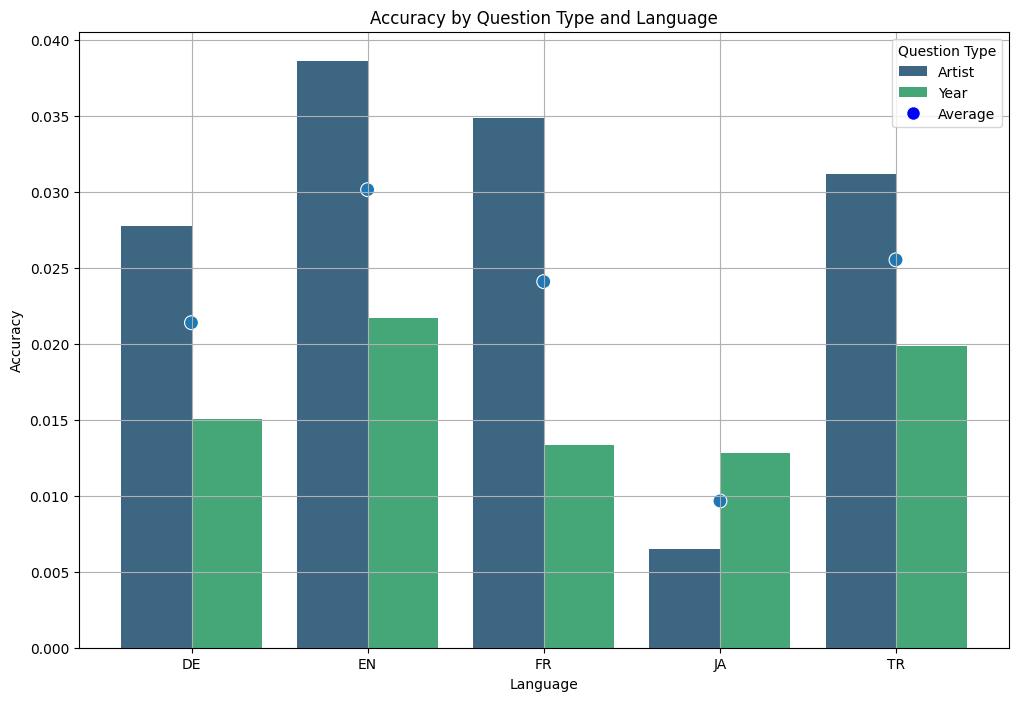

In [4]:
# Calculate the accuracy for each group of question type and language
accuracy_df = combined_df.groupby(['Language', 'question_type'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
accuracy_df = accuracy_df.reset_index()

# Filter only "Location" and "Year" question types
filtered_accuracy_df = accuracy_df[accuracy_df['question_type'].isin(['Artist', 'Year'])]

# Calculate the average accuracy for each language
average_accuracy_df = filtered_accuracy_df.groupby('Language')['Accuracy'].mean().reset_index()
average_accuracy_df['question_type'] = 'Average'

# Combine the average accuracy with the filtered accuracy data
combined_accuracy_df = pd.concat([filtered_accuracy_df, average_accuracy_df], ignore_index=True)

# Plot the accuracies
plt.figure(figsize=(12, 8))

# Bar plot for Location and Year questions
sns.barplot(x='Language', y='Accuracy', hue='question_type', data=filtered_accuracy_df, palette='viridis')

# Scatter plot for Average accuracy
sns.scatterplot(x='Language', y='Accuracy', hue='question_type', style='question_type', data=average_accuracy_df, markers=['o'], s=100, color='blue', legend=False)

# Add a custom legend for the average dots
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], marker='o', color='w', label='Average', markersize=10, markerfacecolor='blue'))
labels.append('Average')

plt.legend(handles=handles, title='Question Type')
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.title('Accuracy by Question Type and Language')
plt.grid(True)
plt.show()

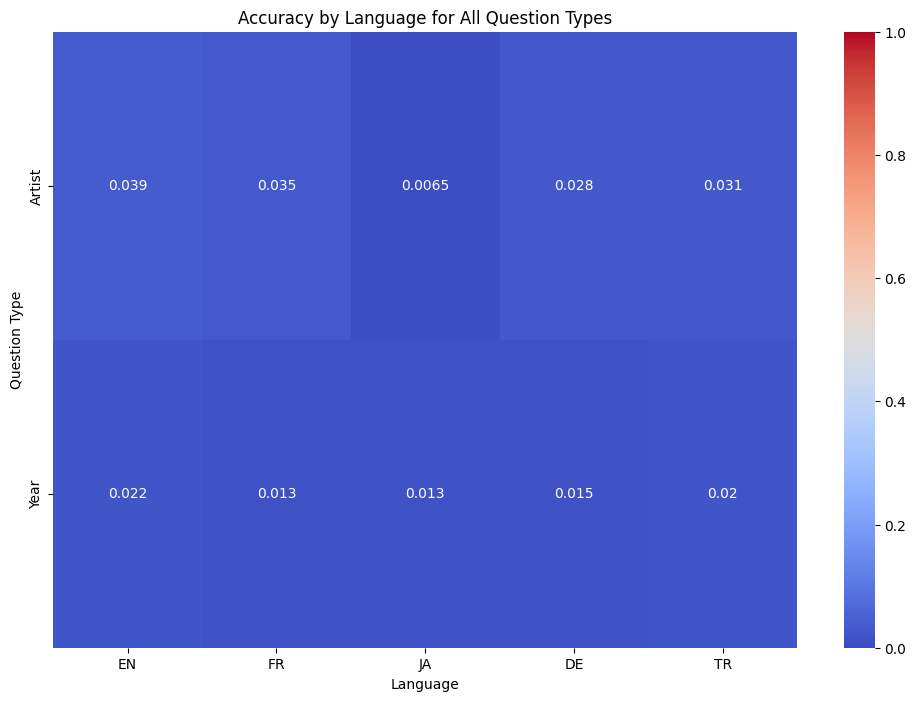

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for groups and languages
language_order = ['EN', 'FR', 'JA', 'DE', 'TR']

# Calculate the accuracy for each group of question type and language
accuracy_df = combined_df.groupby(['question_type', 'Language'])['Compared_Answer'].value_counts(normalize=True).unstack().fillna(0)
accuracy_df['Accuracy'] = accuracy_df[1]  # Accuracy is the proportion of 1s
accuracy_df = accuracy_df.reset_index()

# Filter only "Location" and "Year" question types
filtered_accuracy_df = accuracy_df[accuracy_df['question_type'].isin(['Artist', 'Year'])]

# Create a pivot table for the heat map
pivot_df = filtered_accuracy_df.pivot_table(index='question_type', columns='Language', values='Accuracy')

# Reorder the languages in the pivot table
pivot_df = pivot_df[language_order]

# Plot a combined heatmap for all question types
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel('Language')
plt.ylabel('Question Type')
plt.title('Accuracy by Language for All Question Types')
plt.show()


In [7]:
# Filter for Japanese language (JA) instances where Compared_Answer is 1 or 0
ja_df = combined_df[combined_df['Language'] == 'JA']

# Get the first 5 instances where Compared_Answer is 1
ja_compared_1 = ja_df[ja_df['Compared_Answer'] == 1].head(10)

# Get the first 5 instances where Compared_Answer is 0
ja_compared_0 = ja_df[ja_df['Compared_Answer'] == 0].head(5)

# Concatenate the results for display
result_df = pd.concat([ja_compared_1, ja_compared_0])


result_df

Question  \
269                 Saint Francis Fountain „ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„ÅãÔºü   
699                                 ÂÖöÂâµÁ´ãË®òÂøµÂ°î „ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„ÅãÔºü   
789   Main entrance of the 1900 Paris Exhibition „ÅØ‰ΩïÂπ¥...   
907   Micha≈Ç Doliwo-Dobrowolski monument in Szczecin...   
926                      Shepherd Gate Clock „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   
1608                     Washington Monument „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   
1719  Bronze statues of the generals of the Seven Ye...   
2227                                 „Éü„É¨„Éã„Ç¢„É† „ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„ÅãÔºü   
2256  Tabern√°culo del Hospital Tavera (El Greco) „ÅÆÂâµ‰Ωú...   
2316                             „Éã„Éº„ÉÄ„Éº„É¥„Ç°„É´„ÉàË®òÂøµÁ¢ë „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   
8              First Town hall, Pushkin town „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   
9            First Town hall, Pushkin town „ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„ÅãÔºü   
18                              Khuk Khi Kai „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   
19                            Khuk Khi Kai „ÅØ‰ΩïÂπ¥„Å´ÂÆåÊàê„Åó„Åæ„Åó„Åü„ÅãÔºü   
28                                    Ëá™Áî±„ÅÆÂ•≥Á•ûÂÉè „ÅÆÂâµ‰ΩúËÄÖ„ÅØË™∞„Åß„Åô„ÅãÔºü   

                                           Model_Answer      Correct_Answer  \
269   |\n\nAnswer: 1926\n\n |\n\n## 8. What is the n...                1926   
699   |\n| 5 |  | What is the name of the Japanese c...                1995   
789   1900Âπ¥\n2. The building was designed by what ar...                1900   
907   2022Âπ¥\nÂõûÁ≠î: 2022Âπ¥\nüáØüáµüë®‚Äçüè´\nüòä\n\nAnswer: 2022\n\n...                2022   
926   | What was the creator of the Shepherd Gate Cl...    Charles Shepherd   
1608  ...\nWashington Monument „ÅÆÂâµ‰ΩúËÄÖ„ÅØ„É≠„Éê„Éº„Éà„Éª„Éü„É´„Ç∫ÔºàRobert ...      „É≠„Éê„Éº„Éà„Éª„Éü„É´„Ç∫ (Âª∫ÁØâÂÆ∂)   
1719  1756Âπ¥\n2. The statue of Frederick the Great, t...                1861   
2227  (When was the Millennium completed?)\n\n## 5.6...                2000   
2256  ](https://www.britannica.com/art-and-culture/E...              „Ç®„É´„Éª„Ç∞„É¨„Ç≥   
2316  Ôºâ\nAnswer: The creator of the Niederwald Monum...  Johannes Schilling   
8     A) Mikhail Bulgakov B) Leo Tolstoy C) Alexande...             „É´„Ç§„Ç∏„Éª„É´„Çπ„Ç´   
9     1891Âπ¥\n* 2. What is the name of the famous Rus...                1811   
18    ](https://www.khuk-khikai.com/about/) 1. Who i...          „Éï„É©„É≥„ÇπÈ†ò„Ç§„É≥„Éâ„Ç∑„Éä   
19    (When was Khuk Khii Khai completed?)  |\n| 8. ...                1893   
28    ‚ÜíÂÆÆÂéüÊÇ¶Â≠êÔºâ ‚ÜíÂÆÆÂéüÊÇ¶Â≠êÔºâÔºâ\n4. The Statue of Liberty was d...        „Éï„É¨„Éá„É™„ÇØ„Éª„Éê„É´„Éà„É´„Éá„Ç£   

      Compared_Answer Language  Time_Taken question_type  
269                 1       JA    2.546437          Year  
699                 1       JA    2.550914          Year  
789                 1       JA    2.550102          Year  
907                 1       JA    2.551723          Year  
926                 1       JA    2.518991        Artist  
1608                1       JA    2.518143        Artist  
1719                1       JA    2.544509          Year  
2227                1       JA    2.527672          Year  
2256                1       JA    2.556367        Artist  
2316                1       JA    2.553980        Artist  
8                   0       JA    2.608032        Artist  
9                   0       JA    2.606391          Year  
18                  0       JA    2.576547        Artist  
19                  0       JA    2.574235          Year  
28                  0       JA    2.598495        Artist

In [ ]:
# The biggest issue with the Turkish entries (Turkish language) is that all questions were answered in english. 
# Even though the model understood the questions asked in Turkish, it really failled to asnwer them in the correct manner
# We can model the obtainned results or errors in 4 various ways
#Misinterpretation of the Question: Instances where the model did not understand the question properly.
#Incorrect Information: Cases where the model provided incorrect answers.
#Partial Answers: Situations where the model's answer was incomplete or not fully relevant.
#Language Issues: Problems related to the handling of the Turkish language.

#But most importantly the Language Issues as mistral seems to really be struggling with the handling of the TR language
#Which is proven here with the disrepencies within the obtained accuracies.

In [22]:
#Types of errors
#Language Issues: The model provides a generic response indicating it needs the question to be in Turkish
#or suggests further assistance but does not answer the question.
#Partial Answer: The model provides part of the correct answer but misses important details or context.
#Incorrect Information: The model provides an answer that is factually incorrect or irrelevant to the question asked.

In [ ]:
#Now we look at the japanese scores